In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pickle
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from training.networks import Generator  # ensure the new repo is part of your python path

# your trained network file 
path = "./pretrained/metfaces.pkl"
#path = "./pretrained/ffhq.pkl"

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.

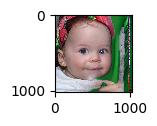

In [27]:
# generate some outputs from the network
# expect some warnings due to missing CUDA and C++ implementations
grid_dim = 1

with open(path, 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
    z = torch.randn([grid_dim*grid_dim, G.z_dim]).cuda()    # latent codes
    c = None                                # class labels (not used in this example)
    out = G(z, c)                           # NCHW, float32, dynamic range [-1, +1]
grid = torchvision.utils.make_grid(out.cpu(), nrow=grid_dim)
grid = (grid * 127.5 + 128).clamp(0, 255).to(torch.uint8)

img = grid.detach().numpy()
img = np.transpose(img, (1, 2 ,0))
plt.figure(figsize = (grid_dim, grid_dim))
plt.imshow(img, interpolation='nearest')

In [28]:
# create a new network using the new defintion
z2 = z.cpu()
G2 = Generator(
        G.z_dim,  # Input latent (Z) dimensionality.
        G.c_dim,  # Conditioning label (C) dimensionality.
        G.w_dim,  # Intermediate latent (W) dimensionality.
        G.img_resolution,  # Output resolution.
        G.img_channels,
).cpu()

# update the weights to match your trained model
g_sd = G.state_dict()
g2_sd = G2.state_dict()

for k, _ in g2_sd.items():
    g2_sd[k] = g_sd[k]
    
    
G2.load_state_dict(g2_sd)

import functools
G2.forward = functools.partial(G2.forward, c=None, force_fp32=True)

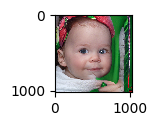

In [29]:
# verify visually that outputs are the same
out = G2(z2)                           # NCHW, float32, dynamic range [-1, +1]
grid = torchvision.utils.make_grid(out.cpu(), nrow=grid_dim)
grid = (grid * 127.5 + 128).clamp(0, 255).to(torch.uint8)

img = grid.detach().numpy()
img = np.transpose(img, (1, 2 ,0))
plt.figure(figsize = (grid_dim, grid_dim))
plt.imshow(img, interpolation='nearest')

In [30]:
# Export to ONNX
import onnx

def pytorch_exporter(model, batch_size=1, gpu=True):
    if gpu:
        model.cuda()
        test_input_datas = (torch.randn((batch_size, 512), dtype=torch.float32).cuda(), )
    else:
        model.cpu()
        test_input_datas = (torch.randn((batch_size, 512), dtype=torch.float32).cpu(), )
    # generate test outputs
    model.eval()
    outs = model(*test_input_datas)
    scripted_model = torch.jit.trace(model, test_input_datas).eval()

    torch.onnx.export(
        scripted_model,
        *test_input_datas,
        "./model.onnx",
        export_params=True,
        verbose=False,
        input_names=['input0'],
        opset_version=10
    )

In [33]:
pytorch_exporter(G2, batch_size=1, gpu=True)

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.

Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/custom_ops.py

Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/home/xsun/anaconda3/envs/stylegan2/lib/python3.8/site-packages/torch/utils/cpp_

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/home/xsun/anaconda3/envs/stylegan2/lib/python3.8/site-packages/torch/utils/cpp_

Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/home/xsun/anaconda3/envs/stylegan2/lib/python3.8/site-packages/torch/utils/cpp_extension.py", line 1284, in load
    return _jit_compile(
  File "/home/xsun/anaconda3/envs/stylegan2/lib/python3.8/site-packages/torch/utils/cpp_extension.py", line 1467, in _jit_compile
    version = JIT_EXTENSION_VERSION

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.

Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/custom_ops.py

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/home/xsun/anaconda3/envs/stylegan2/lib/python3.8/site-packages/torch/utils/cpp_

Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/home/xsun/anaconda3/envs/stylegan2/lib/python3.8/site-packages/torch/utils/cpp_

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/conv2d_gradfix.py:88: UserWarning: conv2d_gradfix not supported on PyTorch 1.13.1+cu117. Falling back to torch.nn.functional.conv2d().
  warnings.warn(
/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/xsun/workspace/tss/kuaishou/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.

Failed!


/home/xsun/anaconda3/envs/stylegan2/lib/python3.8/site-packages/torch/onnx/utils.py:687: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._jit_pass_onnx_graph_shape_type_inference(
/home/xsun/anaconda3/envs/stylegan2/lib/python3.8/site-packages/torch/onnx/utils.py:1172: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  params_dict = _C._jit_pass_onnx_constant_fold(
/home/xsun/anaconda3/envs/stylegan2/lib/python3.8/site-packages/torch/onnx/utils.py:1178: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ../torch/csrc/jit/passes/onnx/constant_fold.cpp:179.)
  _C._j

(1, 3, 1024, 1024)


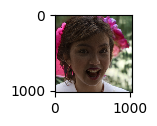

In [38]:
import openvino.runtime as ov
core = ov.Core()
compiled_model = core.compile_model("ffhq.onnx", "CPU")

test_input_datas = {"input0": np.random.rand(1, 512).astype(np.float32)}
#test_input_datas = {"input0": z2.detach().numpy().astype(np.float32)}
results = compiled_model(test_input_datas)
out = results[compiled_model.output(0)]
print(out.shape)
grid = torchvision.utils.make_grid(torch.from_numpy(out), nrow=grid_dim)
grid = (grid * 127.5 + 128).clamp(0, 255).to(torch.uint8)

img = grid.detach().numpy()
img = np.transpose(img, (1, 2 ,0))
plt.figure(figsize = (grid_dim, grid_dim))
plt.imshow(img, interpolation='nearest')